In [7]:
import numpy as np
import matplotlib.pyplot as plt

file="ge.csv"
file="bank_of_america.csv"
date = np.loadtxt(fname = file,dtype=str, delimiter=',', skiprows=1,usecols=0)
close = np.loadtxt(fname = file, delimiter=',', skiprows=1,usecols=4)
N=len(date)
states=np.unique(close)

[[ 0.406 -0.397  0.406]
 [ 0.406 -0.397  0.406]
 [-0.397  0.406 -0.397]
 ...
 [-0.397  0.406 -0.397]
 [ 0.401 -0.401  0.401]
 [ 0.     0.     0.   ]]
Final balance
7376.600489999991


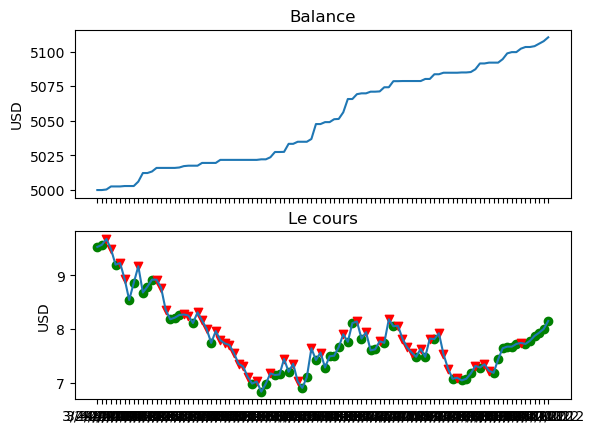

In [19]:
#A : 3: hold, buy, sell

#learning rate
alpha = 0.05

#discount factor
gamma = 0.05

#while pas convergence (convergence = pas d'amelioration)
Q= np.zeros((N,3))

for i in range(10):
    # print(np.round(Q,2))
    # print()

    for t in range(0,N-1):
        for a in range(3):
            if a==0:#buy at t
                if close[t+1] > close[t]: # si ca monte
                    reward = 1
                else:
                    reward = -1
            elif a==1:#sell at t
                if close[t+1] < close[t]: # si ca descend
                    reward = 1
                else:
                    reward = -1
            elif a==2:#hold between t and t+1
                if close[t+1] > close[t]: # si ca monte
                    reward = 1
                else:
                    reward = -1

            Q[t][a]=(1-alpha) * Q[t][a] + alpha * (reward + gamma * max(Q[t+1]))



print(np.round(Q,3))
policy=np.argmax(Q,axis=1)

balance = 5000
nbActions=0
volumeTransaction=10
bal=[balance]

for t in range(N):
    action=policy[t]
    price=close[t]

    #volumeTransaction=int(balance/close[t]*0.05)
    prixTransaction = volumeTransaction*close[t]

    if action == 0 and balance>=prixTransaction:#buy
        nbActions += volumeTransaction
        balance -= prixTransaction

    elif action == 1 :#sell
        balance += nbActions*close[t]
        nbActions = 0

    #elif action == 2:#hold
        #♣do nothing

    bal.append(balance + nbActions*close[t])


print("Final balance")
print(balance + nbActions*close[N-1])

nb=100

fig, ax = plt.subplots(2, sharex='col', sharey='row')

ax[0].plot(bal[:nb])
ax[0].set(ylabel='USD',title='Balance')

ax[1].plot(close[:nb])

buy=(policy==0)*close
buy[buy==0]=float('nan')
ax[1].scatter(date[:nb], buy[:nb], marker="o",color='green')

sell=(policy==1)*close
sell[sell==0]=float('nan')
ax[1].scatter(date[:nb], sell[:nb], marker="v",color='red')

ax[1].set(ylabel='USD', title='Le cours')

plt.show()